In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path
from lib.utils import get_phi_psi_dist, find_kdepeak, find_kdepeak_af
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

In [85]:
proteins = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']
winsizes = [4,5,6,7]
results = {w:[] for w in winsizes}
seqs = []
for id in proteins:
    da = DihedralAdherence(id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], 
                        mode='kde_af')
    da.load_results_da()
    for i,w in enumerate(winsizes):
        results[w].append(da.queries[i].results.assign(da_protein=id))
    seqs.append(pd.DataFrame(dict(id=id, seq=da.seqs)))
seqs = pd.concat(seqs)
results = {w:pd.concat(results[w]) for w in winsizes}

Initializing T1024 ...
Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
Initializing T1096 ...
Results already exist
Casp ID: T1096 	PDB: 7um1
Structure exists: 'pdb/pdb7um1.ent' 
Initializing T1027 ...
Results already exist
Casp ID: T1027 	PDB: 7d2o
Structure exists: 'pdb/pdb7d2o.ent' 
Initializing T1082 ...
Results already exist
Casp ID: T1082 	PDB: 7cn6
Structure exists: 'pdb/pdb7cn6.ent' 
Initializing T1091 ...
Results already exist
Casp ID: T1091 	PDB: 7w6b
Structure exists: 'pdb/pdb7w6b.ent' 
Initializing T1058 ...
Results already exist
Casp ID: T1058 	PDB: 7abw
Structure exists: 'pdb/pdb7abw.ent' 
Initializing T1049 ...
Results already exist
Casp ID: T1049 	PDB: 6y4f
Structure exists: 'pdb/pdb6y4f.ent' 
Initializing T1030 ...
Results already exist
Casp ID: T1030 	PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
Initializing T1056 ...
Results already exist
Casp ID: T1056 	PDB: 6yj1
Structure exists: 'pdb/pdb6yj1.ent' 
Initializing T1038 ...
Resul

In [27]:
for w in winsizes:
    phi = results[w].groupby('phi').size()
    print(w, 'phi', phi.loc[phi.index > 180].to_dict())
    psi = results[w].groupby('psi').size()
    print(w, 'psi', psi.loc[psi.index > 180].to_dict())

4 phi {360.0: 265, 500.0: 1}
4 psi {360.0: 215, 500.0: 1}
5 phi {360.0: 13}
5 psi {360.0: 20}
6 phi {}
6 psi {}
7 phi {}
7 psi {}


In [98]:
counts

seq
HHHH    139755
AALG     27851
AGLT     23478
EAAR     19263
LAGL     18791
dtype: int64

In [104]:
w=4
# source proteins with phi and psi > 180
print(results[w][(results[w].phi > 180) | (results[w].psi > 180)].groupby(['protein_id', 'chain']).size().sort_values(ascending=False).head())
# target proteins with phi and psi > 180
print(results[w][(results[w].phi > 180) | (results[w].psi > 180)].groupby('da_protein').size().sort_values(ascending=False).head())
counts = results[w].groupby('seq').size().sort_values(ascending=False)
over_360_counts = results[w][(results[w].phi > 180) | (results[w].psi > 180)].groupby('seq').size().sort_values(ascending=False)
print()
print(counts.head())
print()
print(over_360_counts.head())
print()
print((over_360_counts / counts).dropna().head())
seqs_with_360 = results[w][(results[w].phi > 180) | (results[w].psi > 180)].groupby('seq').size().index.values

protein_id  chain
6EMK        C        50
            A        46
2NBL        A        10
2PDD        A         6
6EMK        D         5
dtype: int64
da_protein
T1024    91
T1091    87
T1030    69
T1025    48
T1096    46
dtype: int64

seq
HHHH    139755
AALG     27851
AGLT     23478
EAAR     19263
LAGL     18791
dtype: int64

seq
AGLL    43
QYAK    15
ISSS    14
LLRN    12
ALRE    12
dtype: int64

seq
AAKT    0.000252
AARA    0.000413
AEIR    0.000187
AGDA    0.000289
AGGS    0.000301
dtype: float64


        id      seq
348  T1024  SILAGLL
349  T1024  ILAGLLV
350  T1024  LAGLLVS
351  T1024  AGLLVSI
Initializing T1024 ...
Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
               phi          psi       weight      winsize
count  9849.000000  9849.000000  9849.000000  9849.000000
mean    -77.560961     0.150868     2.484313     4.047822
std      29.992652    68.524813     6.892008     0.221800
min    -178.300000  -179.800000     1.000000     4.000000
25%     -83.500000   -42.000000     1.000000     4.000000
50%     -67.500000   -31.300000     1.000000     4.000000
75%     -60.700000     0.600000     1.000000     4.000000
max     177.900000   179.900000    64.000000     6.000000
Residue A of Window SILAGLL centered at 351 of SILAGLL
	Win 4: LAGL - 9396 samples
	Win 5: ILAGL - 435 samples
	Win 6: ILAGLL - 18 samples
	Win 7: SILAGLL - 0 samples
	Found 3 Clusters
	KDEPEAK: Using kdepeak of cluster 0
Ideal:	 (-62.67, -39.61)
X-ray[351]:	 (-64.28, -

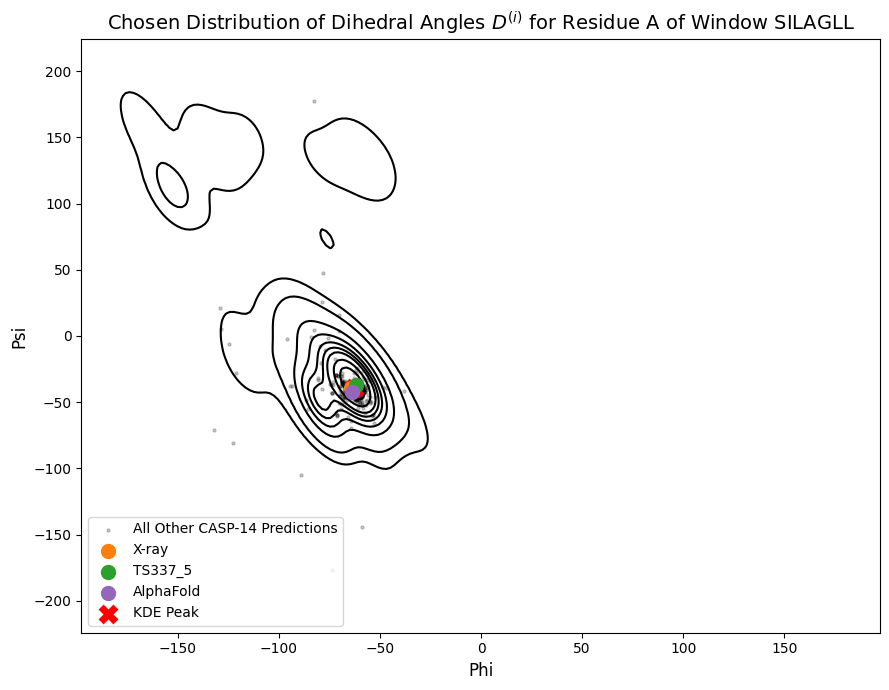

               phi          psi       weight      winsize
count  9849.000000  9849.000000  9849.000000  9849.000000
mean    -77.560961     0.150868     2.484313     4.047822
std      29.992652    68.524813     6.892008     0.221800
min    -178.300000  -179.800000     1.000000     4.000000
25%     -83.500000   -42.000000     1.000000     4.000000
50%     -67.500000   -31.300000     1.000000     4.000000
75%     -60.700000     0.600000     1.000000     4.000000
max     177.900000   179.900000    64.000000     6.000000
Residue A of Window SILAGLL centered at 351 of SILAGLL
	Win 4: LAGL - 9396 samples
	Win 5: ILAGL - 435 samples
	Win 6: ILAGLL - 18 samples
	Win 7: SILAGLL - 0 samples
	Found 3 Clusters
	KDEPEAK: Using kdepeak of cluster 0
Ideal:	 (-62.67, -39.61)
X-ray[351]:	 (-64.28, -39.70), DA=1.61
TS337_5[364]:	 (-61.78, -36.83), DA=2.92
AlphaFold[364]:	 (-63.88, -42.67), DA=3.29
Other Predictions DA:
                 0
count  423.000000
mean     9.123000
std     16.146478
min      0.15

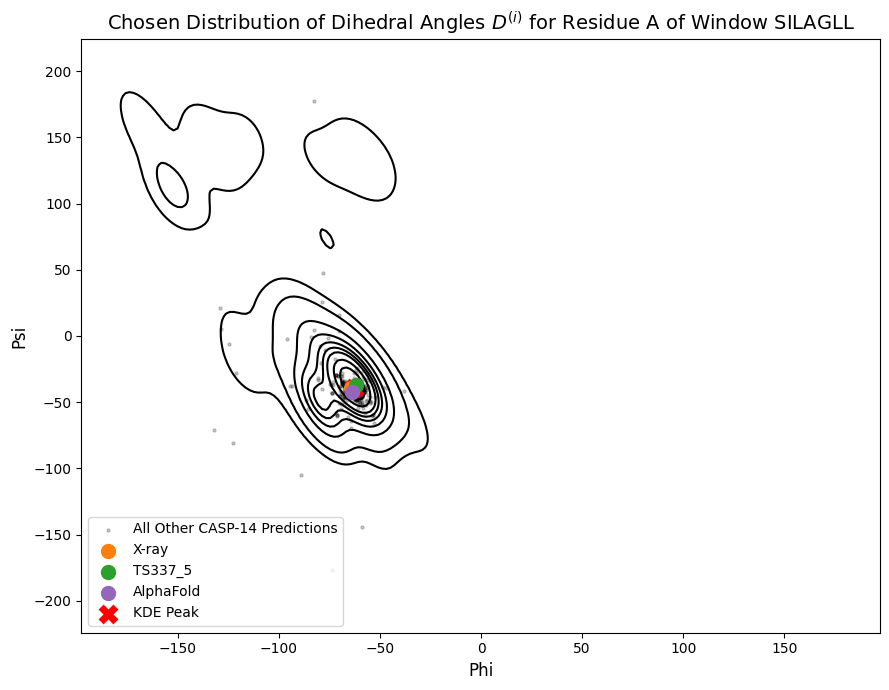

In [105]:
print(seqs[seqs.seq.str.contains('AGLL')])
da = DihedralAdherence('T1024', [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], 
                        mode='kde_af')
da.load_results()
da.plot_da_for_seq('SILAGLL')

for q in da.queries:
    q.results = q.results[(q.results.phi <= 180) & (q.results.psi <= 180)]
da.plot_da_for_seq('SILAGLL')


In [114]:
for id in proteins:
    da = DihedralAdherence(id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128],
                           mode='kde_af') 
    da.load_results_da()
    for i,w in enumerate(winsizes):
        results = da.queries[i].results
        results = results[(results.phi <= 180) & (results.psi <= 180)]
        results.to_csv(da.outdir / f'phi_psi_mined_win{w}.csv')       
        # print('w', results[(results.phi <= 180) & (results.psi <= 180)].shape)
        # print('wo', results[(results.phi > 180) & (results.psi > 180)].shape)

Initializing T1024 ...
Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
Initializing T1096 ...
Results already exist
Casp ID: T1096 	PDB: 7um1
Structure exists: 'pdb/pdb7um1.ent' 
Initializing T1027 ...
Results already exist
Casp ID: T1027 	PDB: 7d2o
Structure exists: 'pdb/pdb7d2o.ent' 
Initializing T1082 ...
Results already exist
Casp ID: T1082 	PDB: 7cn6
Structure exists: 'pdb/pdb7cn6.ent' 
Initializing T1091 ...
Results already exist
Casp ID: T1091 	PDB: 7w6b
Structure exists: 'pdb/pdb7w6b.ent' 
Initializing T1058 ...
Results already exist
Casp ID: T1058 	PDB: 7abw
Structure exists: 'pdb/pdb7abw.ent' 
Initializing T1049 ...
Results already exist
Casp ID: T1049 	PDB: 6y4f
Structure exists: 'pdb/pdb6y4f.ent' 
Initializing T1030 ...
Results already exist
Casp ID: T1030 	PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
Initializing T1056 ...
Results already exist
Casp ID: T1056 	PDB: 6yj1
Structure exists: 'pdb/pdb6yj1.ent' 
Initializing T1038 ...
Resul